# Proyek Analisis Data: Bike Sharing Dataset
Nama : Arya Yanimaharta

ID Dicoding : MC007D5Y0407

Email : 111202113744@mhs.dinus.ac.id

# Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dalam jangka Waktu setahun? mana yang lebih unggul tahun 2011 atau 2012?

- Apakah kondisi cuaca memiliki pengaruh terhadap jumlah pengguna sepeda?

- Apakah ada hubungan antara suhu dan jumlah pengguna yang terdaftar?


- Hari apa penggunaan sepeda paling banyak dan paling sedikit?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

Data Wrangling

In [6]:
# Memuat dataset day.csv
df_day = pd.read_csv("day.csv")
df_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Assesing Data

In [7]:
# Memeriksa tipe data tiap kolom pada data df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek Misiing Value

In [8]:
# Memeriksa missing value pada data df_day
print(df_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Cek Data Duplikasi

In [9]:
# Cek jumlah data duplikat pada DataFrame 'day'
print(f"Total duplikat di DataFrame day: {df_day.duplicated().sum()}")

Total duplikat di DataFrame day: 0


Deskripsi Statistik

In [10]:
# Describe data df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cleaning Data

In [11]:
# Konversi Kolom 'dteday' Menjadi Format Tanggal
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki nilai Value dari kolom **Weekday, month, year, season**

In [12]:
# Mengonversi nilai pada kolom 'weekday' menjadi nama hari yang sesuai
df_day['weekday'] = df_day['dteday'].dt.strftime('%A')

# Mengonversi nilai pada kolom 'mnth' menjadi nama bulan yang sesuai
df_day['mnth'] = df_day['dteday'].dt.strftime('%B')

# Memperbarui nilai pada kolom 'yr' menjadi tahun yang sesuai
df_day['yr'] = df_day['dteday'].dt.year

# Mengganti nilai pada kolom 'season' dengan nama musim yang relevan
df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)


<ipython-input-12-e6727d604886>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)


Normalisasi Kolom Numerik Menggunakan MinMaxScaler untuk menormalkan temp, atemp, hum, dan windspeed.

In [13]:
# Normalisasi Data Numerik pada Kolom 'temp', 'atemp', 'hum', dan 'windspeed'
scaler = MinMaxScaler()

for df in [df_day]:
    df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

print("Data setelah normalisasi (menampilkan beberapa baris teratas):")
print(df_day[['temp', 'atemp', 'hum', 'windspeed']].head())


Data setelah normalisasi (menampilkan beberapa baris teratas):
       temp     atemp       hum  windspeed
0  0.355170  0.373517  0.828620   0.284606
1  0.379232  0.360541  0.715771   0.466215
2  0.171000  0.144830  0.449638   0.465740
3  0.175530  0.174649  0.607131   0.284297
4  0.209120  0.197158  0.449313   0.339143


Validasi Rentang Data

Memastikan weathersit berada dalam rentang yang diharapkan (1-4) sehingga data di luar rentang tersebut akan dihapus

In [14]:
print("\nValidasi rentang data pada kolom kategori...")

# Validasi kolom 'weathersit' harus memiliki nilai antara 1 hingga 4
print("Cek 'weathersit' pada df_day:", df_day[~df_day['weathersit'].between(1, 4)])

# Menghapus data di luar kategori yang valid untuk 'weathersit' saja
df_day = df_day[df_day['weathersit'].between(1, 4)]

print("\nProses Data cleaning Telah selesai. Data siap untuk analisis lebih lanjut.")


Validasi rentang data pada kolom kategori...
Cek 'weathersit' pada df_day: Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Proses Data cleaning Telah selesai. Data siap untuk analisis lebih lanjut.


In [15]:
# Data df_day yang sudah melalui tahapan data cleaning
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.355170,0.373517,0.828620,0.284606,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.379232,0.360541,0.715771,0.466215,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.171000,0.144830,0.449638,0.465740,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.175530,0.174649,0.607131,0.284297,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.209120,0.197158,0.449313,0.339143,82,1518,1600


Setelah melalui tahap pembersihan data pada *df_day*, beberapa proses telah dilakukan, seperti memperbaiki tipe data pada kolom *dteday* agar sesuai dengan format tanggal. Selain itu, nilai pada kolom *weekday*, *mnth*, *yr*, dan *season* telah dikonversi agar lebih mudah dipahami. Kini, kolom *weekday* telah berubah menjadi nama hari (Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, dan Saturday), sementara *mnth* dan *yr* telah sesuai dengan nama bulan dan tahun yang benar. Kolom *season* juga telah diperbarui agar menampilkan nama musim yang sesuai, yaitu *Summer, Spring, Fall,* dan *Winter*. Selain itu, normalisasi telah diterapkan pada kolom *temp*, *atemp*, *hum*, dan *windspeed*, serta dilakukan validasi untuk memastikan rentang data sesuai.

# Exploratory Data Analysis (EDA)
**Explore Data df_day**


1. Melakukan pengelompokan penyewa sepeda (registered dan casual) berdasarkan holiday

In [16]:
# Menggabungkan kolom holiday dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

disimpulkan bahwa rata-rata para penyewa sepeda lebih menyukai sepeda hari kerja (weekday) bukan hari libur (weekend)

2. Melakukan Pengelompokkan sewa sepeda saat weekday/ hari kerja

In [17]:
# Menggabungkan kolom weekday dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Monday     7525    22  4338.123810  455503
Saturday   8714   627  4550.542857  477807
Sunday     8227   605  4228.828571  444027
Thursday   7804   431  4667.259615  485395
Tuesday    7767   683  4510.663462  469109
Wednesday  8173   441  4548.538462  473048

Setelah diketahui bahwa rata-rata penyewa sepeda tertinggi terjadi pada hari kerja (*weekday*), dapat disimpulkan dari hasil yang diperoleh bahwa urutan hari dengan jumlah penyewa terbanyak hingga paling sedikit adalah Jumat (*Friday*), Kamis (*Thursday*), Sabtu (*Saturday*), Rabu (*Wednesday*), Selasa (*Tuesday*), Senin (*Monday*), dan Minggu (*Sunday*).

3. Melakukan pengelompokan penyewa sepeda (registered & casual) berdasarkan bulan (mnth)

In [18]:
# Menggabungkan kolom mnth dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
            max   min         mean     sum
mnth                                      
April      7460   795  4484.900000  269094
August     7865  1115  5664.419355  351194
December   6606   441  3403.806452  211036
February   5062  1005  2655.298246  151352
January    4521   431  2176.338710  134933
July       8173  3285  5563.677419  344948
June       8120  3767  5772.366667  346342
March      8362   605  3692.258065  228920
May        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
October    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

disimpulkan bahwa rata rta penyewa sepeda terbesar adalah bulan juni dan yg paling rendah bulan januari

4. Melakukan pengelompokna penewa sepeda (registered & casual) berdasar tahun (yr)

In [19]:
# Menggabungkan kolom yr dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

5. Melakukan pengelompokan penyewa sepeda (registered dan casual) berdasarkan cuaca (weathersit)

In [20]:
# Menggabungkan kolom weathersit dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

disimpulkan bahwa rata-rata para penyewa sepeda memiliki kecenderungan sering menyewa sepeda saat cuaca ke-1, selanjutnya cuaca ke-2, dan sangat sedikit pada cuaca ke-3

6. Melakukan Pengelompokan penewa sepeda (registerd & casual) berdasar musim (season)

In [21]:
# Menggabungkan kolom season dan cnt untuk melakukan identifikasi nilai max, min, mean, dan sum
df_day.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Berdasarkan hasil yang diperoleh, dapat disimpulkan bahwa rata-rata jumlah penyewa sepeda tertinggi terjadi pada musim gugur (*fall*), sementara musim semi (*spring*) memiliki rata-rata jumlah penyewa sepeda terendah.

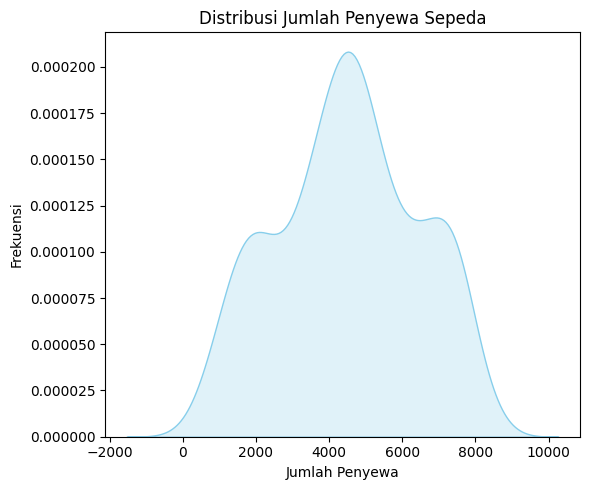

In [22]:
# Membuat visualisasi distribusi data penyewa sepeda
fig, ax = plt.subplots(figsize=(6, 5))

sns.kdeplot(df_day['cnt'], fill=True, color='skyblue', ax=ax)

ax.set_title("Distribusi Jumlah Penyewa Sepeda")
ax.set_xlabel("Jumlah Penyewa")
ax.set_ylabel("Frekuensi")

plt.tight_layout()

plt.show()

Berdasarkan hasil yang diperoleh, distribusi data penyewa sepeda dapat dikategorikan sebagai distribusi normal, karena kurva menunjukkan bentuk yang simetris dengan satu puncak (*unimodal*) dan pola distribusi yang secara bertahap menurun di kedua sisi puncak.

**Visualization & Explanatory Analysis**  

1. Bagaimana pola tren penggunaan sepeda selama satu tahun? Selain itu, di antara tahun 2011 dan 2012, manakah yang memiliki jumlah pengguna lebih tinggi?  
2. Apakah terdapat korelasi antara suhu dengan jumlah pengguna sepeda yang terdaftar?  
3. Sejauh mana kondisi cuaca memengaruhi jumlah pengguna sepeda?  
4. Pada hari apa jumlah penggunaan sepeda mencapai puncaknya dan kapan jumlahnya paling rendah?

1. Bagaimana pola tren penggunaan sepeda selama satu tahun? Selain itu, di antara tahun 2011 dan 2012, manakah yang memiliki jumlah pengguna lebih tinggi?


In [23]:
# Mengelompokkan data berdasarkan akhir setiap bulan ('ME') menggunakan tanggal pada kolom 'dteday'
df_year = df_day.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
df_year.head()

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [25]:
# Mengubah indeks DataFrame 'df_year' menjadi format string bulan-tahun (contoh: 'Jan-22')
df_year.index = df_year.index.strftime('%b-%y')

# Mereset indeks pada DataFrame dan menyimpannya dalam variabel baru 'df_year_users'
df_year_users = df_year.reset_index()

# Mengubah nama kolom 'dteday' menjadi 'yearmonth'
df_year_users = df_year_users.rename(columns={'dteday': 'yearmonth'})

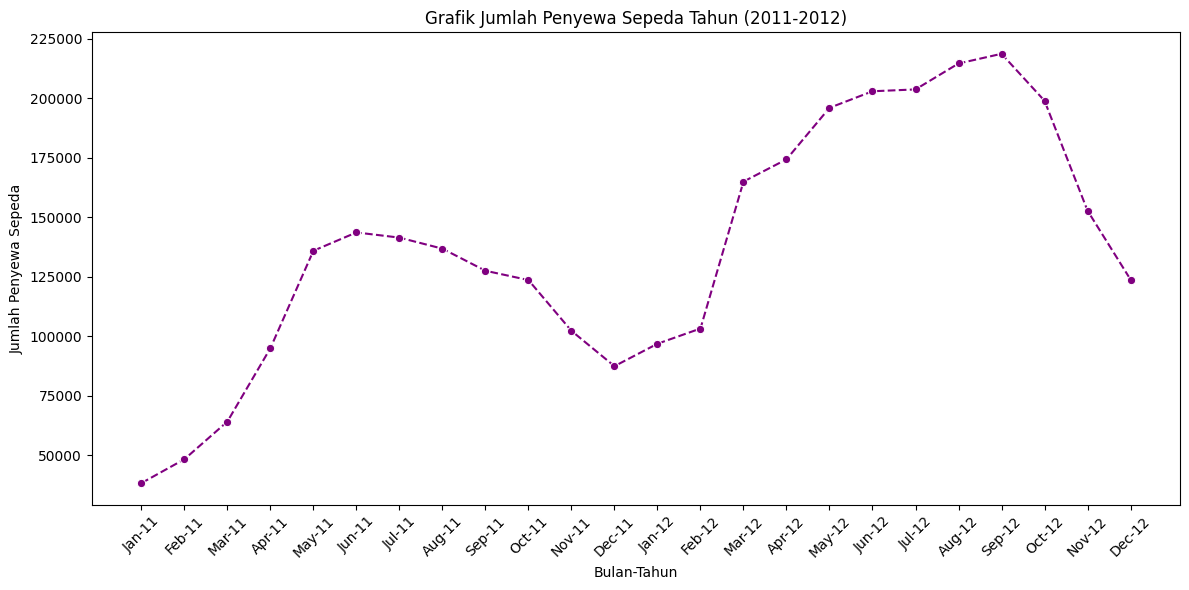

In [26]:
# Menentukan ukuran gambar untuk plot
plt.figure(figsize=(12, 6))

# Membuat grafik garis dengan seaborn, x = 'yearmonth' dan y = 'cnt'
sns.lineplot(x="yearmonth", y="cnt", data=df_year_users, color='purple', marker='o', linestyle='--')

# Menambahkan label pada sumbu x dan y serta judul grafik
plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Grafik Jumlah Penyewa Sepeda Tahun (2011-2012)")

# Memutar label pada sumbu x sebesar 45 derajat untuk keterbacaan
plt.xticks(rotation=45)

# Menyesuaikan tata letak agar elemen-elemen tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()

**Insight:**  

Berdasarkan visualisasi menggunakan *line plot*, dapat dilihat bahwa tren penyewaan sepeda pada awal tahun masih tergolong rendah. Kemudian, jumlah penyewa mengalami peningkatan di pertengahan tahun sebelum akhirnya menurun kembali di akhir tahun. Dari perbandingan kedua tahun, terlihat bahwa tren penggunaan sepeda pada tahun 2011 cenderung lebih rendah dibandingkan tahun 2012. Dengan demikian, dapat disimpulkan bahwa tahun 2012 memiliki jumlah penyewaan sepeda yang lebih tinggi dan menjadi tahun dengan penggunaan sepeda yang lebih unggul.

 2. Apakah terdapat korelasi antara suhu dengan jumlah pengguna sepeda yang terdaftar?  


In [27]:
# Membuat grafik scatter dengan Plotly untuk menunjukkan hubungan suhu (temp) dengan jumlah pengguna terdaftar (registered)
fig = px.scatter(df_day, x="temp", y="registered", title="Hubungan Suhu (temp) dengan Jumlah Pengguna Terdaftar (registered)")

# Mengupdate label pada sumbu x dan y
fig.update_xaxes(title="Suhu (temp)")
fig.update_yaxes(title="Jumlah Pengguna yang Terdaftar")

# Menampilkan grafik
fig.show()

**Insight:**  

Berdasarkan visualisasi menggunakan *scatter plot*, terlihat adanya korelasi positif antara suhu (*temp*) dan jumlah pengguna terdaftar (*registered*). Hal ini menunjukkan bahwa ketika suhu meningkat, jumlah pengguna sepeda yang terdaftar juga cenderung mengalami peningkatan.

3. Sejauh mana kondisi cuaca memengaruhi jumlah pengguna sepeda?  

<ipython-input-28-df1ae9c261b6>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-df1ae9c261b6>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




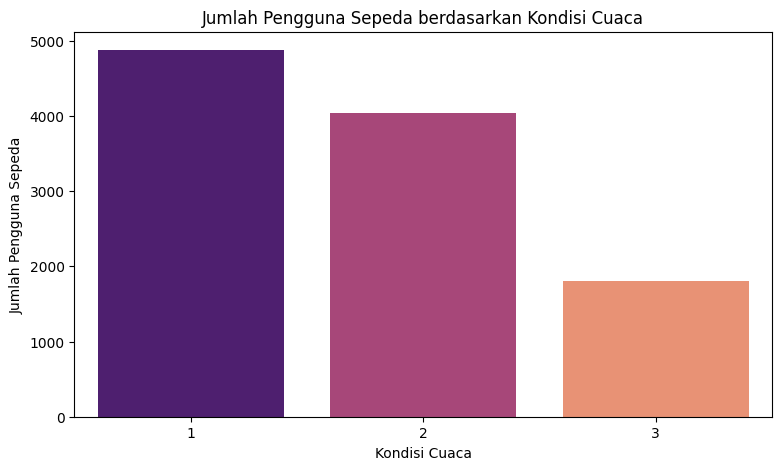

In [28]:
# Membuat grafik barplot dengan seaborn
plt.figure(figsize=(9,5))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=df_day,
    palette='magma',
    ci=None
)
plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**  

Berdasarkan visualisasi menggunakan *bar plot*, terlihat adanya hubungan yang jelas antara kondisi cuaca dan jumlah pengguna sepeda. Grafik menunjukkan bahwa jumlah penyewa sepeda tertinggi terjadi pada kondisi cuaca 1, diikuti oleh kondisi cuaca 2, sementara kondisi cuaca 3 memiliki jumlah penyewa paling sedikit.

4. Pada hari apa jumlah penggunaan sepeda mencapai puncaknya dan kapan jumlahnya paling rendah?



In [29]:
# Mengelompokkan data berdasarkan hari dalam seminggu ('weekday') dan menghitung jumlah penyewa sepeda
weekday_df = df_day.groupby('weekday')[['registered', 'casual','cnt']].sum().reset_index()
weekday_df.head(6)

,weekday,registered,casual,cnt
0,Friday,409552,78238,487790
1,Monday,384719,70784,455503
2,Saturday,323955,153852,477807
3,Sunday,303506,140521,444027
4,Thursday,423935,61460,485395
5,Tuesday,411266,57843,469109


In [30]:
# Menyusun ulang dataFrame 'weekday_df' untuk membuat kolom 'status' yang menggabungkan
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_df_detail = pd.melt(weekday_df,
                            id_vars=['weekday'],
                            value_vars=['registered', 'casual'],
                            var_name='status',
                            value_name='count')

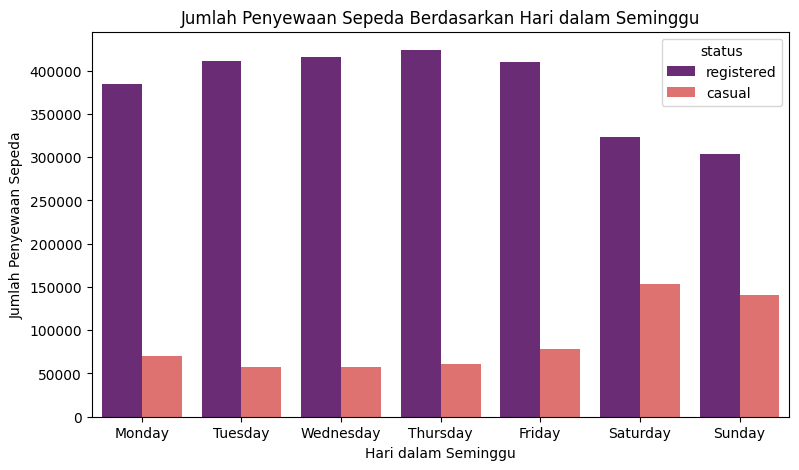

In [31]:
# Visualisasi data
plt.figure(figsize=(9, 5))

sns.barplot(x='weekday', y='count', data=weekday_df_detail, order=day, hue='status', palette="magma")

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")

plt.show()

**Insight:**  

Berdasarkan visualisasi menggunakan *bar plot*, dapat dilihat bahwa jumlah penyewa sepeda, baik pengguna terdaftar (*registered*) maupun tidak terdaftar (*casual*), mencapai puncaknya pada hari Jumat (*Friday*). Sebaliknya, penggunaan sepeda paling rendah terjadi pada hari Minggu (*Sunday*).

**Kesimpulan**  

1. **Tren Penggunaan Sepeda dalam Setahun**  
   Visualisasi menunjukkan bahwa pada awal tahun 2011, jumlah penyewaan sepeda masih tergolong rendah, kemudian meningkat di pertengahan tahun, dan kembali menurun di akhir tahun. Secara keseluruhan, jumlah penyewa sepeda pada tahun 2011 lebih rendah dibandingkan dengan tahun 2012, yang menunjukkan adanya peningkatan signifikan dalam penggunaan sepeda dari tahun ke tahun.  

2. **Hubungan antara Suhu dan Jumlah Pengguna Terdaftar**  
   Hasil visualisasi menunjukkan adanya korelasi positif antara suhu (*temp*) dan jumlah pengguna terdaftar (*registered*). Semakin tinggi suhu, semakin banyak orang yang mendaftar sebagai pengguna sepeda. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang lebih mendukung untuk bersepeda dan meningkatnya aktivitas luar ruangan pada suhu yang lebih nyaman.  

3. **Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda**  
   Terdapat hubungan yang jelas antara kondisi cuaca dan jumlah pengguna sepeda. Berdasarkan visualisasi, jumlah penyewa sepeda terbanyak terjadi pada kondisi cuaca 1 (cuaca cerah), diikuti oleh kondisi cuaca 2 (berawan), sementara kondisi cuaca 3 (hujan atau bersalju) memiliki jumlah pengguna paling sedikit.  

4. **Perbandingan Penggunaan Sepeda pada Hari Kerja vs. Hari Libur**  
   Hasil analisis menunjukkan bahwa penggunaan sepeda tertinggi terjadi pada hari kerja, terutama pada hari Jumat (*Friday*), sementara penggunaan terendah tercatat pada hari Minggu (*Sunday*). Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas sehari-hari, seperti bekerja atau bersekolah, dibandingkan untuk rekreasi di akhir pekan.